In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [3]:
# Explore dataset
print("Head of the dataset:")
print(dataset.head())

Head of the dataset:
   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13  

In [4]:
print("\nShape of the dataset:")
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))


Shape of the dataset:
Rows: 32560 Columns: 15


In [5]:
# Data preprocessing
dataset = dataset.replace('?', np.nan)
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        dataset[col] = encoder.fit_transform(dataset[col])

In [6]:
# Define features (X) and target (Y)
X = dataset.drop('Income', axis=1)
Y = dataset['Income']

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)

# Predict on test data
Y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, Y_pred) * 100
f1 = f1_score(Y_test, Y_pred) * 100

In [8]:
print('\nRandom Forest Classifier Performance:')
print(f'Accuracy score: {accuracy:.2f}%')
print(f'F1 score: {f1:.2f}%')


Random Forest Classifier Performance:
Accuracy score: 85.64%
F1 score: 68.38%


In [9]:
# Visualize some aspects of the dataset
# Example histograms and bar plots
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Histogram of Age')

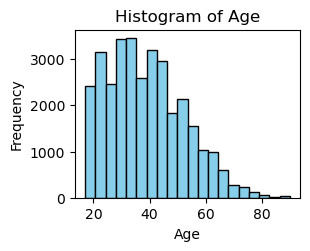

In [10]:
# Histogram of Age
plt.subplot(2, 2, 1)
plt.hist(dataset['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Distribution of Education')

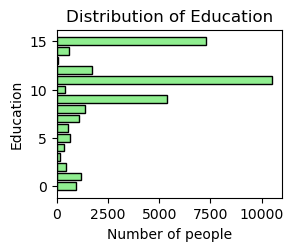

In [11]:
# Bar plot of Education
plt.subplot(2, 2, 2)
edu_counts = dataset['Education'].value_counts()
plt.barh(edu_counts.index, edu_counts.values, color='lightgreen', edgecolor='black')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.title('Distribution of Education')

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>